# Introduction

Do higher film budgets lead to more box office revenue? Is there a relationship using the movie budgets and financial performance data.

**Data Source**: [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')


# Explore and Clean the Data

In [4]:
data.shape

(5391, 6)

In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [6]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [7]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3670,40,6/18/2010,Toy Story 3,"$200,000,000","$1,069,818,229","$415,004,880"
1505,1671,10/11/2000,Men of Honor,"$32,000,000","$82,339,483","$48,814,909"
2302,1048,10/9/2004,Resident Evil: Apocalypse,"$50,000,000","$125,168,734","$50,740,078"
5270,1423,11/11/2016,Billy Lynn’s Long Halftime Walk,"$40,000,000","$25,863,458","$1,738,477"
4642,5284,7/18/2014,An American in Hollywood,"$125,000",$0,$0


In [8]:
data.isna().values.any()
data.duplicated().values.any()
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

print(f'Any NaN values among the data? {data.isna().values.any()}')
print(f'Any duplicated? {data.duplicated().values.any()}')
print(f'Number of duplicateds: {len(duplicated_rows)}')

Any NaN values among the data? False
Any duplicated? False
Number of duplicateds: 0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


No duplicates or NaN.
`Release Date`, `USD_Production_Budget`, `USD_Worldwide_Gross`, `USD_Domestic_Gross` will need type conversions

### Data Type Conversions

In [10]:
chars_to_remove = ['$', ',']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].str.replace(char,'')
    data[col] = pd.to_numeric(data[col])

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [11]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [13]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


The average film costs about 31m to make and makes around 89m in worldwide revenue.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million and they only bring in 3.8m in worldwide revenue.

The minimum domestic and worldwide revenue is 0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was 425,000,000 and the highest worldwide revenue was 2.7 Billion revenue.

In [14]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [15]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


The lowest budget film is 'My Date with Drew' which had worldwide revenue of 181k with 1,100 budget.  This is a sizebale return on investment.

The highest budget film is 'Avatar' which had worldwide revenue of 168 million with 40.5 million budget.


# Investigating the Zero Revenue Films

In [16]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')

zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


We see that there are 512 films in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date after the date on which the dataset was compiled (May 1st, 2018).

In [17]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')

zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


There are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled.

Some international films were never screened in the United States.  An example, "Don Gato, el inicio de la pandilla" made about $4.5 million dollars in the box office, but nothing in the United States. 

### Filtering on Multiple Conditions

In [18]:
worldwide_excl_us = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
print(f'Number of international releases: {len(worldwide_excl_us)}')
worldwide_excl_us.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [19]:
worldwide_excl_us = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print(f'Number of international releases: {len(worldwide_excl_us)}')
worldwide_excl_us.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

Unreleased films with release date after **May 1st, 2018** (date of report), will need to be removed to avoid skewing the results.

In [20]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [21]:
data_clean = data[data.Release_Date < scrape_date]
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0


### Films that Lost Money


In [22]:
loss_making = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
percentage_loss_making = len(loss_making)/ len(data_clean)
percentage_loss_making

0.37277117384843983

37.2% of films do not make money indicating that the film industry is quite risky.

# Seaborn for Data Viz: Bubble Charts

In [23]:
import seaborn as sns

### Plotting Movie Releases over Time


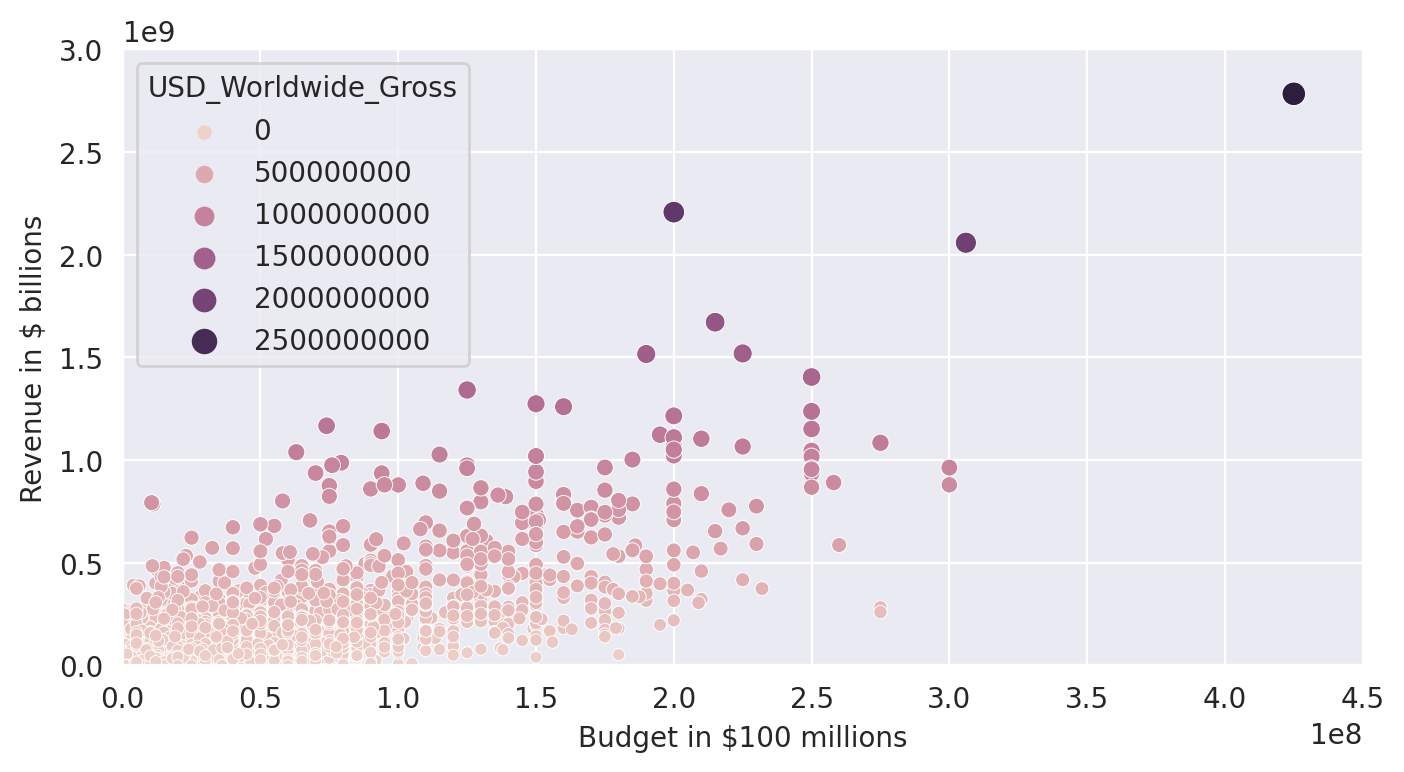

In [24]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, 
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross', # colour
                         size='USD_Worldwide_Gross') # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

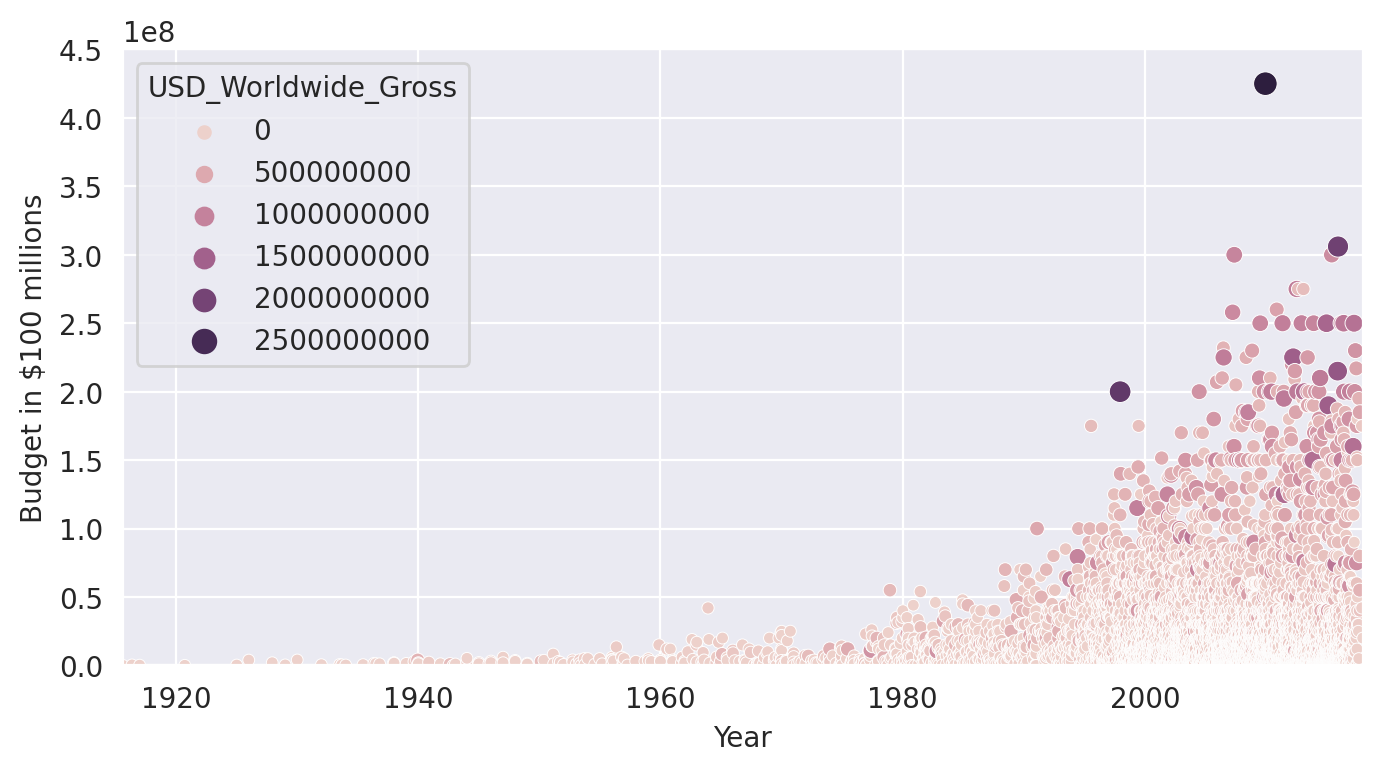

In [25]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, 
                         x='Release_Date', 
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', # colour
                         size='USD_Worldwide_Gross') # dot size

ax.set(ylim=(0, 450000000),
       xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       ylabel='Budget in $100 millions',
       xlabel='Year')

plt.show()

Movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick

In [26]:
year = pd.DatetimeIndex(data_clean['Release_Date']).year
year

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [27]:
decade = year // 10 * 10

data_clean['Decade'] = decade
data_clean.head()

/var/folders/94/q6yhhmgj03s2zdhcgl_s6v3r0000gp/T/ipykernel_52687/1343759456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = decade


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films


In [28]:
old_films = data_clean[data_clean['Decade'] < 1970]
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [29]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


There were 153 films till 1969.
The most expensive film was Cleopatra with a budget of $42 million

In [30]:
new_films = data_clean[data_clean['Decade'] >= 1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


# Seaborn Regression Plots

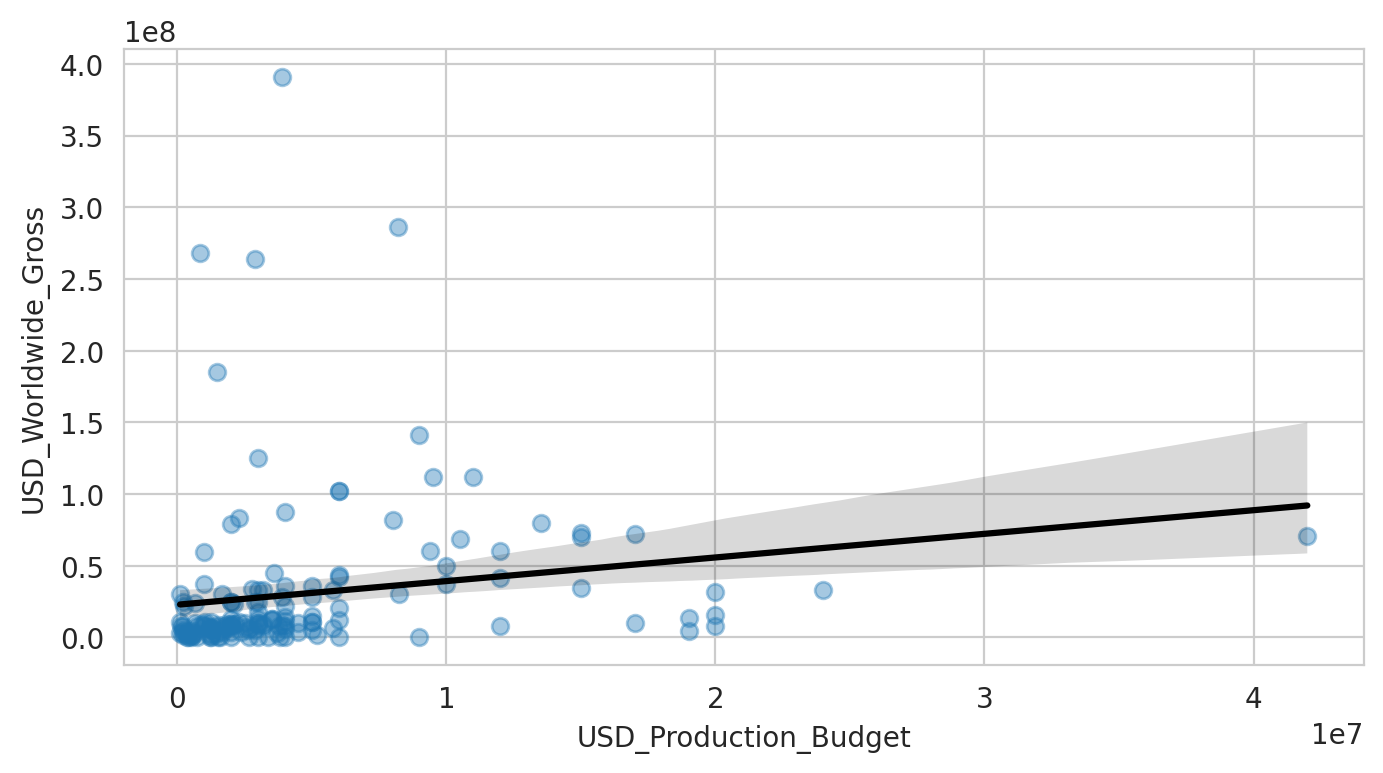

In [31]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross', 
                scatter_kws = {'alpha': 0.4}, 
                line_kws = {'color': 'black'})

The chart shows Cleopatra on the far right. But also, we see that many lower budget films made much more money. The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all.

[Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions'),
 (0.0, 3000000000.0),
 (0.0, 450000000.0)]

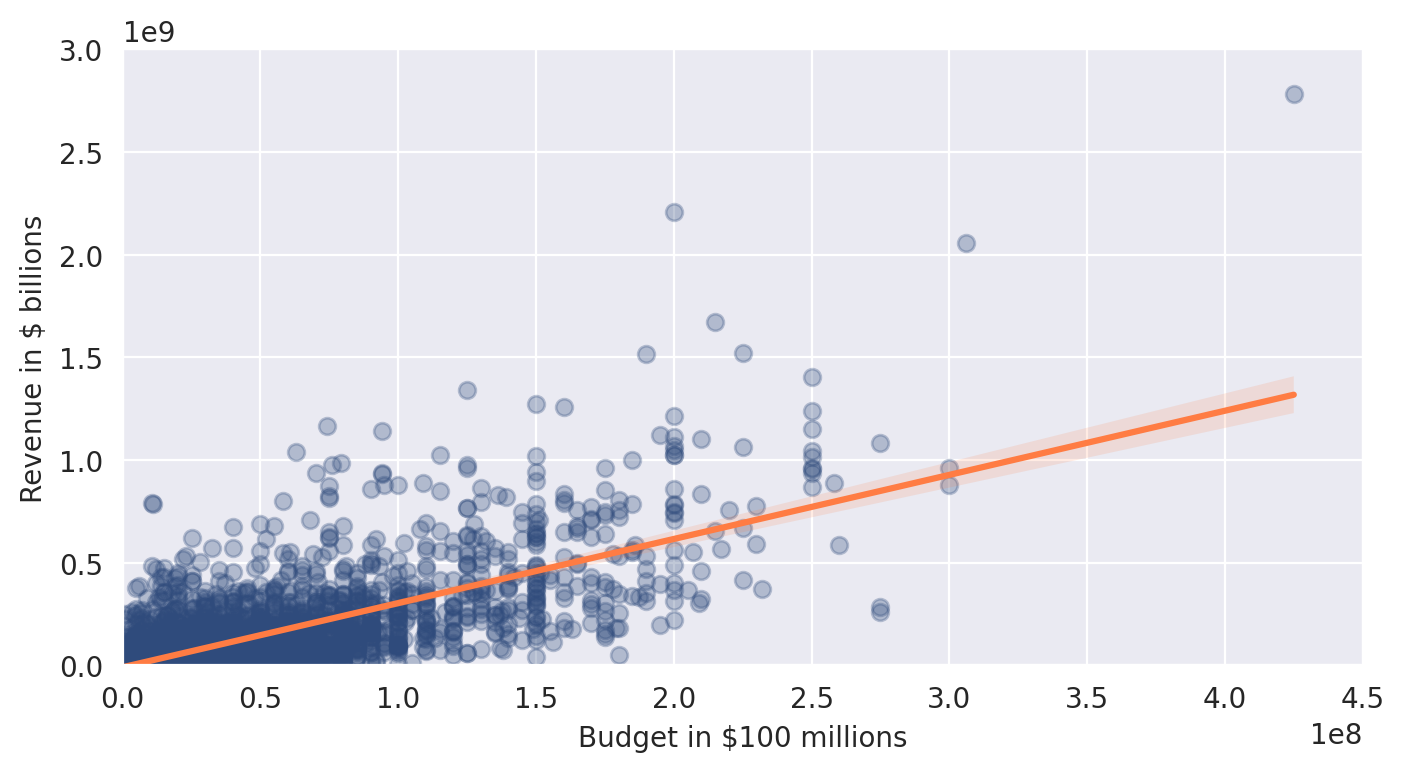

In [32]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross', 
                     color = '#2f4b7c',
                     scatter_kws = {'alpha': 0.3}, 
                     line_kws = {'color': '#ff7c43'})

ax.set(ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',
       ylim=(0, 3000000000), 
       xlim=(0, 450000000))

The regression line fits better for newer films and indicates that there is a relationship between film budget and gross revenue and the confidence interval is much narrower.
On average a 150 million budget film is predicted to return $500 million per the regression line.

# Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

### New films

In [33]:
regression = LinearRegression()

In [34]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

LinearRegression()

In [35]:
regression.intercept_

array([-8650768.00661096])

In [36]:
regression.coef_

array([[3.12259592]])

In [37]:
regression.score(X,y)

0.5577032617720403

The intercept is -8.65 million and the coefficient is 3.1.  So every extra 1 in budget, movie revenue increases by 3.1 indicating a positive correlation, which could partly influence why the significant increase is big budget films in the over the past 40 years.

The score/R-squared/goodness of fit is about 56% - the model explains 56% of the variance.
This is based on a single variable and is simplistic compared to the real world so its a pretty decent model.

### Old films

In [38]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

LinearRegression()

In [39]:
regression.intercept_

array([22821538.63508039])

In [40]:
regression.coef_

array([[1.64771314]])

In [41]:
regression.score(X,y)

0.02937258620576877

The intercept is 22.8 million and coefficient is 1.64 and R-squared os 3%.
This is a poorly fitted regression like with only 3% of the variance explained by this model.


# Make a Prediction

**Question**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [42]:
22821538 + 1.64771314 * 350000000

599521137.0

In [43]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 million film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 million film is around $600000000.0.
